In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HDFS1_data.csv')
df.head()

,row,type_INFO,type_WARN,comp_FSname,comp_PacketResponder,comp_DataXceiver,comp_FSDataset,comp_DataBlockScanner,comp_DataNode,comp_DataTransfer,...,T38,T39,T40,T41,T42,T43,T44,T0,sequence_in_block,label
0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [3]:
X = df.drop(['row', 'minutes', 'label'], axis = 1)
y = df['label']

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X[["sequence_in_block"]] = min_max_scaler.fit_transform(X[["sequence_in_block"]])

(X["sequence_in_block"].min(), X["sequence_in_block"].max())

(0.0, 0.9999999999999999)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

X_train (8381721, 57)
X_test  (2793908, 57)
y_train (8381721,)
y_test  (2793908,)


In [11]:
logistic_regression = LogisticRegression(max_iter=4000)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

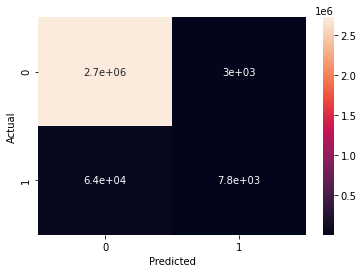

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [13]:
confusion_matrix

Predicted,0,1
Actual,,
0,2718817,2982
1,64347,7762


In [14]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9759014971144361


In [15]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.7224497393894267
Recall: 0.1076425966245545


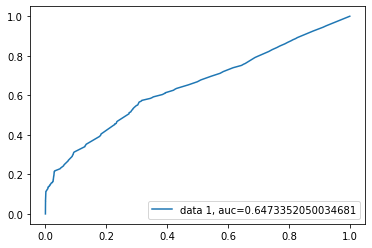

In [16]:
y_pred_proba = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Random Forest Regressor

In [20]:
regressor = RandomForestClassifier(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

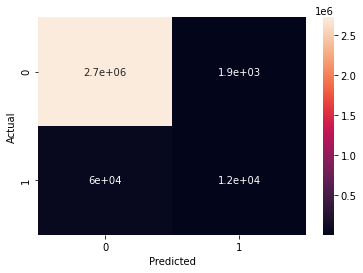

In [21]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [22]:
confusion_matrix

Predicted,0,1
Actual,,
0,2719891,1908
1,59706,12403


In [23]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9779470190142266
Precision: 0.8666759835091887
Recall: 0.17200349470939827


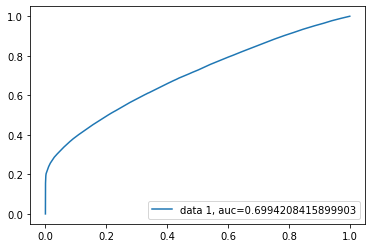

In [25]:
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()